# Report02 - 泰坦尼克号的生存预测

+ 何文韬
+ 2021300234


##  任务简介

泰坦尼克号生存预测任务是一个经典的机器学习问题，旨在通过乘客的相关信息来预测他们在泰坦尼克号沉船事件中的生存情况。这个任务具有重要的历史意义，对于理解灾难发生时人们的生存概率以及相关因素具有重要价值。

在这个任务中，我们将使用乘客的特征数据，例如年龄、性别、船舱等级、票价等，以及其他可能与生存情况相关的信息来构建一个预测模型。我们的目标是根据这些特征来预测每个乘客生还的可能性。


## 解决途径
为了实现这个目标，我们将进行数据收集和预处理，包括清洗数据、处理缺失值和异常值等操作，以确保数据的准确性和一致性。然后利用pytorch框架建立模型，在有限次数的迭代中选取最优的模型。

##  分析数据

In [1]:
import pandas as pd
train_df = pd.read_csv("./data/train.csv")
train_df.head(20)

PassengerId  Survived  Pclass  \
0             1         0       3   
1             2         1       1   
2             3         1       3   
3             4         1       1   
4             5         0       3   
5             6         0       3   
6             7         0       1   
7             8         0       3   
8             9         1       3   
9            10         1       2   
10           11         1       3   
11           12         1       1   
12           13         0       3   
13           14         0       3   
14           15         0       3   
15           16         1       2   
16           17         0       3   
17           18         1       2   
18           19         0       3   
19           20         1       3   

                                                 Name     Sex   Age  SibSp  \
0                             Braund, Mr. Owen Harris    male  22.0      1   
1   Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                              Heikkinen, Miss. Laina  female  26.0      0   
3        Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                            Allen, Mr. William Henry    male  35.0      0   
5                                    Moran, Mr. James    male   NaN      0   
6                             McCarthy, Mr. Timothy J    male  54.0      0   
7                      Palsson, Master. Gosta Leonard    male   2.0      3   
8   Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
9                 Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   
10                    Sandstrom, Miss. Marguerite Rut  female   4.0      1   
11                           Bonnell, Miss. Elizabeth  female  58.0      0   
12                     Saundercock, Mr. William Henry    male  20.0      0   
13                        Andersson, Mr. Anders Johan    male  39.0      1   
14               Vestrom, Miss. Hulda Amanda Adolfina  female  14.0      0   
15                   Hewlett, Mrs. (Mary D Kingcome)   female  55.0      0   
16                               Rice, Master. Eugene    male   2.0      4   
17                       Williams, Mr. Charles Eugene    male   NaN      0   
18  Vander Planke, Mrs. Julius (Emelia Maria Vande...  female  31.0      1   
19                            Masselmani, Mrs. Fatima  female   NaN      0   

    Parch            Ticket     Fare Cabin Embarked  
0       0         A/5 21171   7.2500   NaN        S  
1       0          PC 17599  71.2833   C85        C  
2       0  STON/O2. 3101282   7.9250   NaN        S  
3       0            113803  53.1000  C123        S  
4       0            373450   8.0500   NaN        S  
5       0            330877   8.4583   NaN        Q  
6       0             17463  51.8625   E46        S  
7       1            349909  21.0750   NaN        S  
8       2            347742  11.1333   NaN        S  
9       0            237736  30.0708   NaN        C  
10      1           PP 9549  16.7000    G6        S  
11      0            113783  26.5500  C103        S  
12      0         A/5. 2151   8.0500   NaN        S  
13      5            347082  31.2750   NaN        S  
14      0            350406   7.8542   NaN        S  
15      0            248706  16.0000   NaN        S  
16      1            382652  29.1250   NaN        Q  
17      0            244373  13.0000   NaN        S  
18      0            345763  18.0000   NaN        S  
19      0              2649   7.2250   NaN        C

In [2]:
train_df.shape

(891, 12)

In [3]:
train_df.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


依据上表可以发现年龄、船舱号和港口这三列有缺失，因此将船舱号列、乘客号列和船票号列一起删除。

In [5]:
train_df.drop('PassengerId', axis=1, inplace=True)
train_df.drop('Ticket', axis=1, inplace=True)
train_df.drop('Cabin', axis=1, inplace=True)

<Figure size 640x480 with 0 Axes>

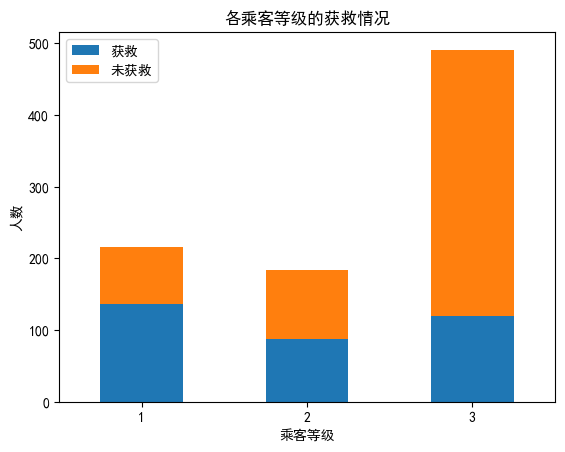

In [6]:
from pylab import *
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
mpl.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['axes.unicode_minus'] = False

fig = plt.figure()
fig.set(alpha=0.2)

Suvived_0 = train_df.Pclass[train_df.Survived == 0].value_counts()
Suvived_1 = train_df.Pclass[train_df.Survived == 1].value_counts()
df = pd.DataFrame({u"获救": Suvived_1, u"未获救": Suvived_0})
df.plot(kind='bar', stacked=True)
plt.xticks(rotation=360)
plt.title(u'各乘客等级的获救情况')
plt.xlabel(u'乘客等级')
plt.ylabel(u'人数')
plt.show()

可以看出乘客等级越高，获救的概率就越高

In [7]:
import re

def get_title(name):
    title_search = re.search('([A-Za-z]+)\.',name)
    if title_search:
        return title_search.group(1)
    return

titles = train_df["Name"].apply(get_title)
print(pd.value_counts(titles))

Name
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: count, dtype: int64


In [8]:
# 将Name列改名为Title
train_df.rename(columns={'Name':'Title'}, inplace=True)
train_df['Title'] = train_df['Title'].apply(get_title)
title_classification = {'Officer':['Capt', 'Col', 'Major', 'Dr', 'Rev'],
                       'Royalty':['Don', 'Sir', 'Countess', 'Lady'],
                       'Mrs':['Mme', 'Ms', 'Mrs'],
                       'Miss':['Mlle', 'Miss'],
                       'Mr':['Mr'],
                       'Master':['Master','Jonkheer']}
title_map = {}
for title in title_classification.keys():
    title_map.update(dict.fromkeys(title_classification[title], title))

train_df['Title'] = train_df['Title'].map(title_map)

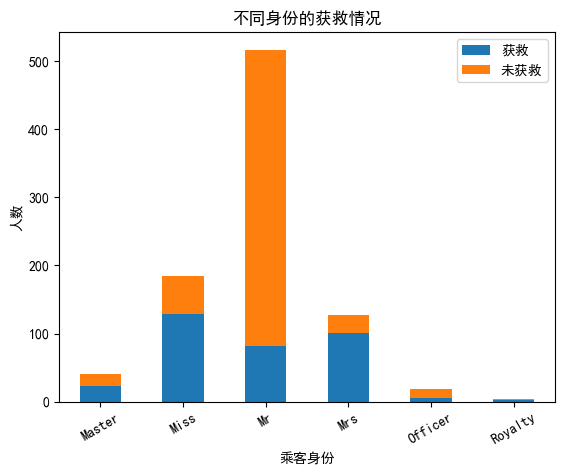

In [9]:
Suvived_0 = train_df.Title[train_df.Survived == 0].value_counts()
Suvived_1 = train_df.Title[train_df.Survived == 1].value_counts()
df = pd.DataFrame({u"获救": Suvived_1, u"未获救": Suvived_0})
df.plot(kind='bar', stacked=True)
plt.xticks(rotation=30)
plt.title(u'不同身份的获救情况')
plt.xlabel(u'乘客身份')
plt.ylabel(u'人数')
plt.show()

可以看出，女士的获救率要远高于男士，身份地位高的人获救率也比较高

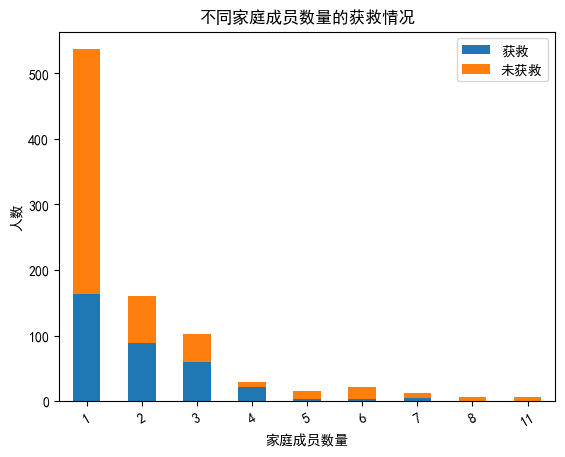

In [10]:
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch'] + 1
Suvived_0 = train_df.FamilySize[train_df.Survived == 0].value_counts()
Suvived_1 = train_df.FamilySize[train_df.Survived == 1].value_counts()
df = pd.DataFrame({u"获救": Suvived_1, u"未获救": Suvived_0})
df.plot(kind='bar', stacked=True)
plt.xticks(rotation=30)
plt.title(u'不同家庭成员数量的获救情况')
plt.xlabel(u'家庭成员数量')
plt.ylabel(u'人数')
plt.show()

plt.show()

In [11]:
train_df.drop('SibSp', axis=1, inplace=True)
train_df.drop('Parch', axis=1, inplace=True)

家庭成员为4个的获救率最高。

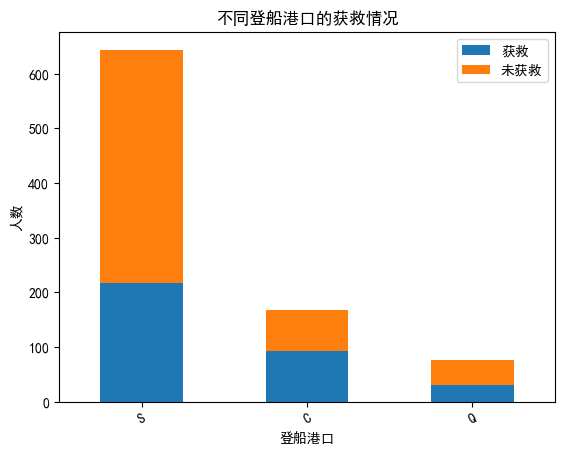

In [12]:
Suvived_0 = train_df.Embarked[train_df.Survived == 0].value_counts()
Suvived_1 = train_df.Embarked[train_df.Survived == 1].value_counts()
df = pd.DataFrame({u"获救": Suvived_1, u"未获救": Suvived_0})
df.plot(kind='bar', stacked=True)
plt.xticks(rotation=30)
plt.title(u'不同登船港口的获救情况')
plt.xlabel(u'登船港口')
plt.ylabel(u'人数')
plt.show()

船港口不同，生存率不同。在C港口上船的获救率最高，而在S港口上船的获救率最低。

##  模型训练

##  处理缺失值

In [13]:
def handle_age(age):
    if age <= 15:
        return 0
    elif age <= 60:
        return 1
    else:
        return 2
    
def handle_fare(fare):
    if fare <= 32:
        return 0
    elif fare <= 100:
        return 1
    elif fare <= 200:
        return 2
    else:
        return 3
    
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].mean()).map(handle_age)
train_df['Embarked'] = train_df['Embarked'].fillna('S')
train_df['Fare'] = train_df['Fare'].map(handle_fare)

In [14]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Survived    891 non-null    int64 
 1   Pclass      891 non-null    int64 
 2   Title       891 non-null    object
 3   Sex         891 non-null    object
 4   Age         891 non-null    int64 
 5   Fare        891 non-null    int64 
 6   Embarked    891 non-null    object
 7   FamilySize  891 non-null    int64 
dtypes: int64(5), object(3)
memory usage: 55.8+ KB


In [15]:
train_df.head()

Survived  Pclass Title     Sex  Age  Fare Embarked  FamilySize
0         0       3    Mr    male    1     0        S           2
1         1       1   Mrs  female    1     1        C           2
2         1       3  Miss  female    1     0        S           1
3         1       1   Mrs  female    1     1        S           2
4         0       3    Mr    male    1     0        S           1

## 编码数据

 对 分类类型 列进行LabelEncoding 举例：A, B, C, D, E --LabelEncoding--> 0, 1, 2, 3, 4 将分类类型变成连续的数值变量，有利于模型的预测和提高准确率

In [16]:
train_df.head()

Survived  Pclass Title     Sex  Age  Fare Embarked  FamilySize
0         0       3    Mr    male    1     0        S           2
1         1       1   Mrs  female    1     1        C           2
2         1       3  Miss  female    1     0        S           1
3         1       1   Mrs  female    1     1        S           2
4         0       3    Mr    male    1     0        S           1

In [17]:
title_map2num = {'Officer': 1, 'Royalty': 2, 'Mrs': 3, 'Miss': 4, 'Mr':5, 'Master': 6}
train_df['Title'] = train_df['Title'].map(title_map2num)

In [18]:
sex_map2num = {'female': 0, 'male': 1}
train_df['Sex'] = train_df['Sex'].map(sex_map2num)

In [19]:
embarked_map2num = {'S': 0, 'C': 1, 'Q': 2}
train_df['Embarked'] = train_df['Embarked'].map(embarked_map2num)

In [20]:
train_df.head()

Survived  Pclass  Title  Sex  Age  Fare  Embarked  FamilySize
0         0       3      5    1    1     0         0           2
1         1       1      3    0    1     1         1           2
2         1       3      4    0    1     0         0           1
3         1       1      3    0    1     1         0           2
4         0       3      5    1    1     0         0           1

## 使用Pytorch搭建逻辑回归模型

In [23]:
import logging
import pickle
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader
from torch.utils.data import random_split

class Titanic_Model(nn.Module):
  def __init__(self, input_dim, num_classes):
    super().__init__()
    self.input_dim   = input_dim
    self.num_classes = num_classes

    self.linear_layer = nn.Linear(input_dim, num_classes)

  def forward(self, inputs):
    outputs = self.linear_layer(inputs)
    return outputs

  @staticmethod
  def compute_accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

  @staticmethod
  def log_epoch_loss_and_acc(prefix, epoch, epoch_loss, epoch_acc, interval=5):
    if epoch % interval == 0:
      logging.info(f'{prefix}_Epoch [{epoch}], loss: {epoch_loss:.4f},'
                   f' acc: {epoch_acc:.4f}.')

  def evaluate(self, batch, loss_func, need_acc=False, no_grad=False):
    if no_grad:
      with torch.no_grad():
        inputs, labels = batch
        outputs = self(inputs)
        loss = loss_func(outputs, labels)
    else:
      inputs, labels = batch
      outputs = self(inputs)
      loss = loss_func(outputs, labels)

    if need_acc:
      acc  = self.compute_accuracy(outputs, labels)
      return {'loss': loss, 'acc': acc}
    else:
      return {'loss': loss}

  def compute_epoch_loss_and_acc(self, dataloader, loss_func):
    results = [self.evaluate(batch, loss_func, need_acc=True, no_grad=True)
                                    for batch in dataloader]
    batch_losses = [r['loss'] for r in results]
    epoch_loss   = torch.stack(batch_losses).mean()
    batch_accs   = [r['acc'] for r in results]
    epoch_acc    = torch.stack(batch_accs).mean()
    return {'epoch_loss': epoch_loss, 'epoch_acc': epoch_acc}

  def epoch_postprocess(self, prefix, data_loader, epoch,
                        history, loss_func, log_interval):
    loss_and_acc = self.compute_epoch_loss_and_acc(data_loader, loss_func)
    epoch_loss   = loss_and_acc['epoch_loss']
    epoch_acc    = loss_and_acc['epoch_acc']
    history.append({'epoch_loss': epoch_loss,
                    'epoch_acc': epoch_acc})
    self.log_epoch_loss_and_acc(prefix, epoch,
                                     epoch_loss,
                                     epoch_acc,
                                     log_interval)

  def train(self, train_loader, val_loader, num_epochs, lr,
            loss_func=F.cross_entropy, opt_func=torch.optim.SGD,
            log_interval=5):
    optimizer = opt_func(self.parameters(), lr)
    self.history_train = []  # history of train set
    self.history_val   = []  # history of validation set

    # initial loss and accuracy of training dataset
    self.epoch_postprocess('Train', train_loader, 0,
                           self.history_train, loss_func, log_interval)

    # initial loss and accuracy of validation dataset
    self.epoch_postprocess('Val', val_loader, 0,
                           self.history_val, loss_func, log_interval)

    # iteration
    for epoch in range(num_epochs):
      for batch in train_loader:
        loss = self.evaluate(batch, loss_func, need_acc=False)['loss']
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

      # training dataset loss and accuracy
      self.epoch_postprocess('Train', train_loader, epoch+1,
                             self.history_train, loss_func, log_interval)

      # validation dataset loss and accuracy
      self.epoch_postprocess('Val', val_loader, epoch+1,
                             self.history_val, loss_func, log_interval)

  def predict(self, inputs):
    outputs = self(inputs)
    _, preds = torch.max(outputs, dim=1)
    return [preds[i].item() for i in range(len(preds))]

  def save_model(self, save_file):
    torch.save(self.state_dict(), save_file)
    pickle.dump(self.history_train, open('titanic_history_train.pkl', 'wb'))
    pickle.dump(self.history_val, open('titanic_history_val.pkl', 'wb'))


  def recover_model(self, save_file):
    self.load_state_dict(torch.load(save_file))
    self.history_train = pickle.load(open('titanic_history_train.pkl', 'rb'))
    self.history_val   = pickle.load(open('titanic_history_val.pkl', 'rb'))

将原数据集划分为训练集和验证集

In [24]:
# convert pandas dataframe to numpy array
train_data = train_df.to_numpy()
# convert numpy array to tensor
inputs = torch.from_numpy(train_data[:, 1:]).type(torch.float)
labels = torch.from_numpy(train_data[:, 0]).type(torch.long)
dataset = TensorDataset(inputs, labels)
train_ds, val_ds = random_split(dataset, [742, 149])

使用gpu加速计算

In [25]:
def to_device(data, device):
  """Move tensor(s) to chosen device"""
  if isinstance(data, (list,tuple)):
    return [to_device(x, device) for x in data]
  return data.to(device, non_blocking=True)

class DeviceDataLoader():
  """Wrap a dataloader to move data to a device (default: cpu)"""
  def __init__(self, dl, device):
    self.dl = dl
    self.device = device

  def __iter__(self):
    """Yield a batch of data after moving it to device"""
    for b in self.dl:
      yield to_device(b, self.device)

  def __len__(self):
    """Number of batches"""
    return len(self.dl)

In [27]:
logging.basicConfig(format='%(asctime)s %(levelname)s:%(message)s', \
                      level=logging.INFO, datefmt='%m/%d/%Y %I:%M:%S %p')
x_dim         = 7   # input dimension
y_dim         = 2   # label dimension
train_sz      = 742
val_sz        = 149
batch_size    = 16
num_epochs    = 100
learning_rate = 0.005
device = torch.device('cuda')

train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader   = DataLoader(val_ds, batch_size)
# move dataloader to gpu
train_loader = DeviceDataLoader(train_loader, device)
val_loader   = DeviceDataLoader(val_loader, device)

# initialize linear regression model
logging.info("Initializing linear regression model.")
titanic_model = Titanic_Model(x_dim, y_dim)
# move model parameters to gpu
to_device(titanic_model, device)
logging.info("Start training...")
titanic_model.train(train_loader, val_loader, num_epochs,
                    learning_rate, log_interval=10, opt_func=torch.optim.SGD
)
logging.info("Training finished.")

logging.info("Save model.")
titanic_model.save_model('report02-titanic_model.pth')

12/30/2023 12:12:18 PM INFO:Initializing linear regression model.
12/30/2023 12:12:18 PM INFO:Start training...
12/30/2023 12:12:18 PM INFO:Train_Epoch [0], loss: 1.2269, acc: 0.3803.
12/30/2023 12:12:18 PM INFO:Val_Epoch [0], loss: 1.1669, acc: 0.4225.
12/30/2023 12:12:19 PM INFO:Train_Epoch [10], loss: 0.5752, acc: 0.6831.
12/30/2023 12:12:19 PM INFO:Val_Epoch [10], loss: 0.6512, acc: 0.6087.
12/30/2023 12:12:20 PM INFO:Train_Epoch [20], loss: 0.5423, acc: 0.7247.
12/30/2023 12:12:20 PM INFO:Val_Epoch [20], loss: 0.6174, acc: 0.6587.
12/30/2023 12:12:20 PM INFO:Train_Epoch [30], loss: 0.5195, acc: 0.7380.
12/30/2023 12:12:20 PM INFO:Val_Epoch [30], loss: 0.6036, acc: 0.6650.
12/30/2023 12:12:21 PM INFO:Train_Epoch [40], loss: 0.5080, acc: 0.7438.
12/30/2023 12:12:21 PM INFO:Val_Epoch [40], loss: 0.5934, acc: 0.6838.
12/30/2023 12:12:22 PM INFO:Train_Epoch [50], loss: 0.4974, acc: 0.7589.
12/30/2023 12:12:22 PM INFO:Val_Epoch [50], loss: 0.5788, acc: 0.6963.
12/30/2023 12:12:23 PM INF

训练得到的模型在测试集上的识别准确率为79.7%，在验证集上的识别准确率为74.12%。

In [28]:
history_train = pickle.load(open('titanic_history_train.pkl', 'rb'))
history_val = pickle.load(open('titanic_history_val.pkl', 'rb'))

画出loss与迭代次数的关系图

Text(0.5, 1.0, 'Loss vs. No. of epochs')

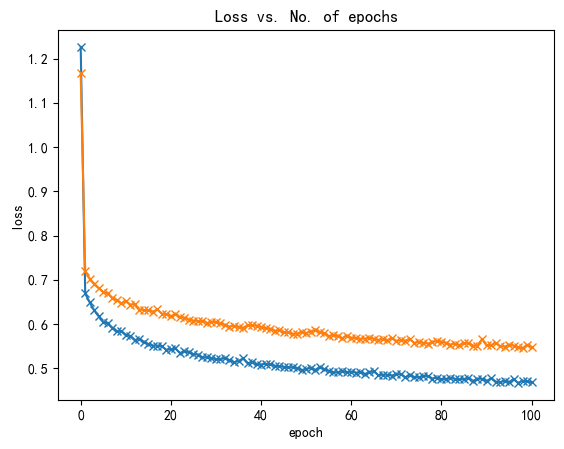

In [29]:
train_losses = [float(x['epoch_loss']) for x in history_train]
val_losses = [float(x['epoch_loss']) for x in history_val]
plt.plot(train_losses, '-x', val_losses, '-x')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Loss vs. No. of epochs')

画出准确率与迭代次数的关系图

Text(0.5, 1.0, 'Accuracy vs. No. of epochs')

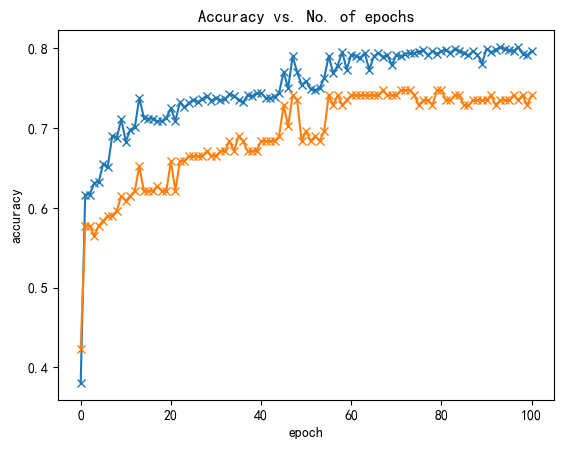

In [30]:
train_accs = [float(x['epoch_acc']) for x in history_train]
val_accs = [float(x['epoch_acc']) for x in history_val]
plt.plot(train_accs, '-x', val_accs, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs. No. of epochs')

##  心得体会

在完成泰坦尼克号生存预测任务后，我对机器学习和数据分析的应用有了更深入的理解。本次项目，虽然已经进行过预处理，但是准确率还是只能在80%左右，还需要进一步去调整参数，优化模型。通过完成这个任务，我认识到机器学习在实际问题中的广泛应用。它可以帮助我们从大量数据中提取有用的信息，并构建准确的预测模型。在未来，我将继续学习和应用机器学习技术，以解决更多复杂的问题，并为决策提供更可靠的支持。